# Phases 1 and 2 Revisited

## *Prompt*

**Microsoft's Making Moves into Movies**

>* What types of movies are performing the best a the box offices?
>* What actions should they take based on the data?

**What questions will guide my process?**

>* 
>* 

**What preconceived ideas do I have about the data? What guesses can I make now?**

>* 
>* 

## *Process*

>1. Import .csv's
>2. Clean data
>3. EDA w. visuals
>4. **Determine initial insights and actions**
>5. Create new features
>6. Test for correlations/multicollinearity
>7. Perform statistical testing
>8. Create LinReg model for **inference**
>9. Create LinReg model for **predictions**
>10. **Present final results for inferences, predictions**
    1. Include initial, final insights and recommendations

# Imports

## Packages

In [31]:
## Accessing stored data
import csv
import os,glob

## Data exploration and statistics
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Creating Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## Settings
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data

In [32]:
## Creating list of files to loop through for data
data_folder = 'zippedData/'
data_files = glob.glob(f'{data_folder}*.csv*')
data_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [33]:
## Looping through individual data files

## Code adapted from James Irving
## Source: youtube.com/watch?v=rufvTgBEYN8&list=PLFknVelSJiSxSwXifV_ysDg50fzbuTzVt&index=41

clean_names = {}
split = '-----'*25

for file in data_files:
    name = file.replace('.csv.gz','').split('\\')[-1].replace('.','_')
    print(split)
    
    print(f"Preview of {name}:")
    clean_names[name] = pd.read_csv(file)
    display(clean_names[name].head(5))
    print()

-----------------------------------------------------------------------------------------------------------------------------
Preview of bom_movie_gross:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_name_basics:


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_akas:


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.00
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.00
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.00



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_basics:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_crew:


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_principals:


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



-----------------------------------------------------------------------------------------------------------------------------
Preview of imdb_title_ratings:


,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21



-----------------------------------------------------------------------------------------------------------------------------
Preview of tmdb_movies:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186



-----------------------------------------------------------------------------------------------------------------------------
Preview of tn_movie_budgets:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Functions

In [34]:
## Not working - unknown error

## Data Type Conversion

# def split_str(df, list_col, change, result):
#     '''Splits strings in a list of columns based on what value to change 
#     and the desired result.
    
#     Args:
#         * dataframe source
#         * list of selected columns
#         * charater to change from (str)
#         * charater to change to (str)'''
    
    
#     for i in list_col:
#         try:
#             df[i] = df[i].map((lambda x: int(x.replace(change,result))))

#         except Exception:
#             print('---'*25)
#             print(f'Already converted {df[i]}')
#             print()

# #         display(df[i])

#         return df

# Cleaning

## Slicing desired DataFrames from Dictionary for Exploration

In [35]:
## Selecting for genre details
title_basics = clean_names['imdb_title_basics']
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


In [36]:
## Selecting for budget and gross details
movie_basics = clean_names['tn_movie_budgets']
movie_basics

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [37]:
## Selecting for gross details
movie_gross = clean_names['bom_movie_gross']
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


## Merging Dataframes

In [38]:
## Merging title_basics and movie_basics on primary title

merged_basics_primary = pd.merge(title_basics,movie_basics, 
                                 left_on= 'primary_title', right_on= 'movie')
merged_basics_primary

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,nan,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.00,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,nan,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,nan,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [39]:
# ## Deprecated - focused on larger data set - Merging title_basics and movie_basics on original title

# merged_basics_original = pd.merge(title_basics,movie_basics, 
#                                   left_on= 'original_title', right_on= 'movie')
# merged_basics_original

In [40]:
df = merged_basics_primary.copy()

## Converting Currencies from Str to Int

In [41]:
## Testing .map for looping
# df['worldwide_gross'] = df['worldwide_gross'].map((lambda x: int(x.replace('$','').replace(',',''))))
# df['worldwide_gross']

In [42]:
## Converting gross amounts from strings to integers and removing 

dollar_to_int = ['production_budget','worldwide_gross','domestic_gross']

for i in dollar_to_int:
    try:
        df[i] = df[i].map((lambda x: int(x.replace('$','').replace(',',''))))

    except Exception:
        print('---'*25)
        print('Already converted.')
        print()
        
    display(df[i][:5])

0    45000000
1    20000000
2      200000
3      200000
4    25000000
Name: production_budget, dtype: int64

0        73706
1    122133227
2      1165996
3      1165996
4      9313302
Name: worldwide_gross, dtype: int64

0           0
1    70433227
2     1109808
3     1109808
4      720828
Name: domestic_gross, dtype: int64

In [43]:
df['worldwide_gross']

0           73706
1       122133227
2         1165996
3         1165996
4         9313302
          ...    
3810       174255
3811     12592907
3812     27882226
3813    124823094
3814            0
Name: worldwide_gross, Length: 3815, dtype: int64

## Removing Duplicate "Movie" Column

In [44]:
## Verifying primary title and movie columns are matching
df[df.loc[:,'primary_title'] != df.loc[:,'movie']]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [45]:
## Dropping duplicated "movie" column due to dupe date

for col in df.columns:
    try:
        df.drop('movie', axis=1, inplace=True)
    except:
        pass

df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,nan,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227
2,tt0326592,The Overnight,The Overnight,2010,88.00,NaN,21,"Jun 19, 2015",200000,1109808,1165996
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302
...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,nan,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255
3811,tt9729206,Diner,Diner,2019,nan,Crime,11,"Apr 2, 1982",5000000,12592907,12592907
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094


## Filling Null Values

In [46]:
## Filling null values with "missing" to allow further processing

df_filled = df.fillna('Missing').copy()
display(df.isna().sum())
display(df_filled.isna().sum())

tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Creating Seasons

In [47]:
## Changing release date to datetime datatype

df_filled['release_datetime'] = pd.to_datetime(df_filled['release_date'])
df_filled['release_datetime']

0      2012-12-31
1      1995-08-18
2      2015-06-19
3      2015-06-19
4      2013-03-22
          ...    
3810   2008-11-14
3811   1982-04-02
3812   2008-08-27
3813   2004-10-29
3814   2007-03-13
Name: release_datetime, Length: 3815, dtype: datetime64[ns]

In [48]:
df_filled['release_date']

0       Dec 31, 2012
1       Aug 18, 1995
2       Jun 19, 2015
3       Jun 19, 2015
4       Mar 22, 2013
            ...     
3810    Nov 14, 2008
3811     Apr 2, 1982
3812    Aug 27, 2008
3813    Oct 29, 2004
3814    Mar 13, 2007
Name: release_date, Length: 3815, dtype: object

In [49]:
df_filled['release_date'][0]

'Dec 31, 2012'

In [50]:
test_month = df_filled['release_date'][0][:3]
test_month

'Dec'

In [51]:
## Creating new column for the month of each release date
release_month = []

for movie in df_filled['release_date']:
    release_month.append(movie[:3])
    
df_filled['release_month'] = release_month

In [52]:
## Using M/L to slice out month from string
df_filled['release_month'] = df_filled['release_date'].map(lambda x: x[:3])
df_filled['release_month']

0       Dec
1       Aug
2       Jun
3       Jun
4       Mar
       ... 
3810    Nov
3811    Apr
3812    Aug
3813    Oct
3814    Mar
Name: release_month, Length: 3815, dtype: object

In [53]:
## Using datetime dtype to create months column
df_filled['release_datetime'].dt.month_name()

0       December
1         August
2           June
3           June
4          March
          ...   
3810    November
3811       April
3812      August
3813     October
3814       March
Name: release_datetime, Length: 3815, dtype: object

In [54]:
## Using .str to convert original 'genres' strings column into a proper list
df_filled['genres'].str.lower().str.split(',')

0        [action, animation, comedy]
1       [action, adventure, fantasy]
2                          [missing]
3                  [comedy, mystery]
4        [adventure, drama, romance]
                    ...             
3810            [documentary, sport]
3811                         [crime]
3812        [action, drama, romance]
3813                         [crime]
3814                   [documentary]
Name: genres, Length: 3815, dtype: object

In [55]:
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,Aug
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,Nov
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,Apr
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,Oct


In [115]:
season = []

for month in df_filled['release_month']:
    if month == 'Jan':
        season.append('Winter')
    elif month == 'Feb':
        season.append('Winter')
    elif month == 'Mar':
        season.append('Spring')
    elif month == 'Apr':
        season.append('Spring')
    elif month == 'May':
        season.append('Spring')
    elif month == 'Jun':
        season.append('Summer')
    elif month == 'Jul':
        season.append('Summer')
    elif month == 'Aug':
        season.append('Summer')
    elif month == 'Sep':
        season.append('Fall')
    elif month == 'Oct':
        season.append('Fall')
    elif month == 'Nov':
        season.append('Fall')
    elif month == 'Dec':
        season.append('Winter')
    else:
        print('na')


In [116]:
df_filled['season'] = season
df_filled['season']

0       Winter
1       Summer
2       Summer
3       Summer
4       Spring
         ...  
3810      Fall
3811    Spring
3812    Summer
3813      Fall
3814    Spring
Name: season, Length: 3815, dtype: object

In [117]:
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month,season,genres_list
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec,Winter,"[Action, Animation, Comedy]"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,Aug,Summer,"[Action, Adventure, Fantasy]"
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun,Summer,[Missing]
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun,Summer,"[Comedy, Mystery]"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,Mar,Spring,"[Adventure, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,Nov,Fall,"[Documentary, Sport]"
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,Apr,Spring,[Crime]
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug,Summer,"[Action, Drama, Romance]"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,Oct,Fall,[Crime]


## Splitting genres

In [66]:
df_filled['genres_list'] = df_filled['genres'].map(lambda x: x.split(','))
df_filled

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month,season,genres_list
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec,4,"[Action, Animation, Comedy]"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,Aug,3,"[Action, Adventure, Fantasy]"
2,tt0326592,The Overnight,The Overnight,2010,88.00,Missing,21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun,2,[Missing]
3,tt3844362,The Overnight,The Overnight,2015,79.00,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,2015-06-19,Jun,2,"[Comedy, Mystery]"
4,tt0337692,On the Road,On the Road,2012,124.00,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,2013-03-22,Mar,1,"[Adventure, Drama, Romance]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Missing,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,2008-11-14,Nov,4,"[Documentary, Sport]"
3811,tt9729206,Diner,Diner,2019,Missing,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,1982-04-02,Apr,2,[Crime]
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug,3,"[Action, Drama, Romance]"
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,Oct,4,[Crime]


## Determining Genres per Title

In [67]:
plot_df = df_filled.explode('genres_list')
plot_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_datetime,release_month,season,genres_list
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec,4,Action
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec,4,Animation
0,tt0249516,Foodfight!,Foodfight!,2012,91.00,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,2012-12-31,Dec,4,Comedy
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,Aug,3,Action
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Missing,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,1995-08-18,Aug,3,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug,3,Action
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug,3,Drama
3812,tt9805168,Traitor,Traitor,2015,110.00,"Action,Drama,Romance",25,"Aug 27, 2008",22000000,23530831,27882226,2008-08-27,Aug,3,Romance
3813,tt9844102,Ray,Ray,2018,111.00,Crime,8,"Oct 29, 2004",40000000,75305995,124823094,2004-10-29,Oct,4,Crime


In [68]:
plot_df = df_filled.explode('genres_list')

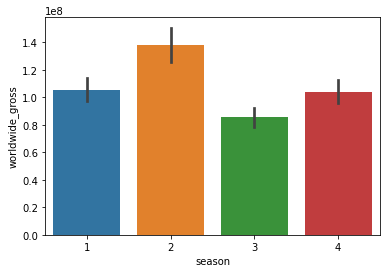

In [69]:
sns.barplot(data=plot_df, x='season', y='worldwide_gross');

In [ ]:
sns.set_context('notebook')

# ✨ TODO

* Fix x-labels: not matching b/t graphs
* Fix y-labels: "Worldwide Gross ($)"
* Change suptitles from season = # to "Spring" etc.

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


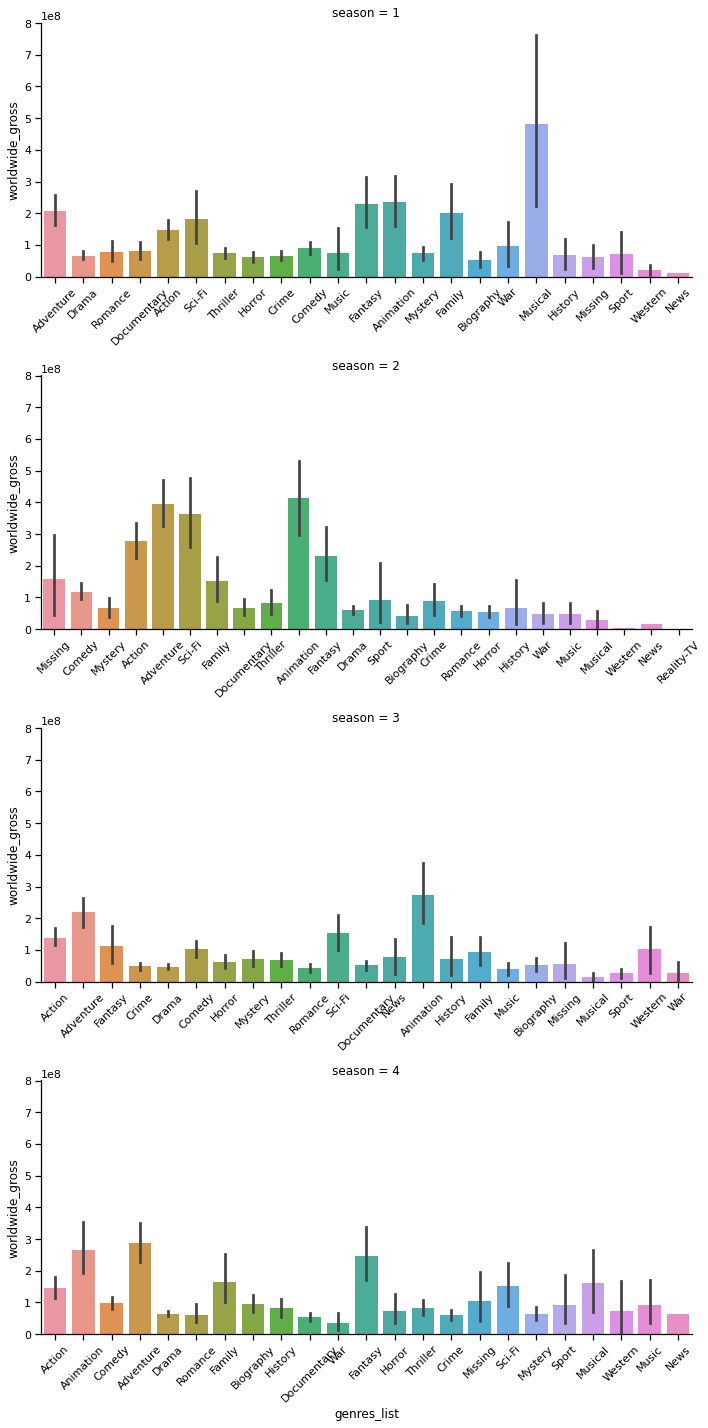

In [114]:
## Visualizing each season's performance
chart = sns.catplot(data=plot_df, col='season',
            y='worldwide_gross', kind='bar', x='genres_list', col_wrap=1, 
            aspect=2, sharex=False)
chart.set_xticklabels(rotation=45)
plt.tight_layout();

In [ ]:
# months = {'Jan': 4, 'Feb': 4, 'Mar': 1, 'Apr': 1,
#          'May': 1, 'Jun': 2, 'Jul': 2, 'Aug': 2,
#          "Sep": 3, 'Oct': 3, 'Nov': 3, 'Dec': 4}

# mnth_lst = list(months.keys())
# mnth_num = 

In [ ]:
# cond = [month == 'Jan',month =='Feb',month =='Mar',month =='Apr',
#         month =='May',month =='Jun',month =='Jul',month == 'Aug',
#         month =="Sep",month == 'Oct',month == 'Nov',month == 'Dec']

# choice = [df_filled['season'] =1,df_filled['season'] =1 ,df_filled['season']=1,
#           df_filled['season'] =2,df_filled['season'] =2 ,df_filled['season']=2,
#           df_filled['season'] =3,df_filled['season'] =3 ,df_filled['season']=3,
#           df_filled['season'] =4,df_filled['season'] =4 ,df_filled['season']=4]

# for month in df_filled['release_month']:
#     np.select(cond, choice, np.nan)

In [ ]:
# cond = ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug',"Sep", 'Oct', 'Nov',
#         'Dec']

# choice = [1,2,3,4,5,6,7,8,9,10,11,12]

# np.select(cond, choice, np.nan)

In [ ]:
# ## Given a series of movies...
# for movie in df_filled['release_date']:
#     ## Select the first three values from each string to get the month...
#     month = movie[:3]
#     for abr, season in months:
#         print (season)
    

In [ ]:
# ## May not be needed...
# ## Creating Season

# winter = [1, 2, 3]
# spring = [4, 5, 6]
# summer = [7, 8 ,9]
# fall = [10, 11, 12]

# Initial Insights

In [ ]:
## Visualizing results

plt.figure(figsize=(15,4))
sns.barplot(data=plot_df, x= 'genres_list', y='worldwide_gross')
plt.xticks(rotation=45, ha= 'right')
plt.suptitle('Movie Performance by Genre')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross ($)');

**Top 3:**
>1. Animation (highest gross w/ moderate risk based on error)
2. Adventure (2nd highest gross, smaller risk)
3. Sci-Fi 

**Wildcard:** 
>Musicals (moderate performance, but largest and most significant error indicates large amount of risk.

# Feature Engineering

# Correlations/Multicollinearity

# Statistical Testing

# Inferential Modeling

# Predictive Modeling

# Final Results